In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv("WineQuality.csv")

In [ ]:
features = dataset.iloc[:,:-1]
target = dataset.iloc[:,-1]

In [ ]:
quality_counts = dataset.groupby('quality').size()
print(quality_counts)

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


5 is the most common quality

In [ ]:
subset = dataset[['fixed acidity', 'free sulfur dioxide', 'alcohol','quality']]
corr_matrix = subset.corr() # Use a list of column names to select multiple colu

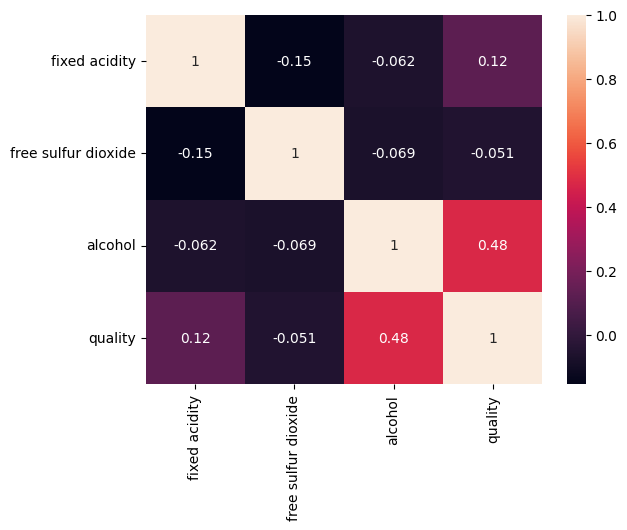

In [ ]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

Average Residual Sugar for Best and Worst Quality Wine

In [ ]:
subset = dataset[dataset['quality']==8][['quality','residual sugar']]
print(subset)

      quality  residual sugar
267         8             3.6
278         8             6.4
390         8             1.4
440         8             2.2
455         8             5.2
481         8             2.8
495         8             2.6
498         8             2.6
588         8             2.0
828         8             2.3
1061        8             1.8
1090        8             1.9
1120        8             2.5
1202        8             1.8
1269        8             1.8
1403        8             1.7
1449        8             2.0
1549        8             1.8


In [ ]:
subset['residual sugar'].mean()

2.5777777777777775

In [ ]:
subset1 = dataset[dataset['quality']==3][['quality','residual sugar']]
print(subset1)
subset1['residual sugar'].mean()

      quality  residual sugar
459         3            2.20
517         3            2.10
690         3            4.25
832         3            1.50
899         3            3.40
1299        3            2.10
1374        3            1.20
1469        3            2.10
1478        3            5.70
1505        3            1.80


2.6350000000000002

In [ ]:
volatile_acidity = dataset['volatile acidity']
quality = dataset['quality']
correlation = volatile_acidity.corr(quality)
print(correlation)

-0.390557780264007


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [ ]:
cf = DecisionTreeClassifier()
cf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = cf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.56875


In [ ]:
from sklearn.ensemble import RandomForestClassifier
cf = RandomForestClassifier(n_estimators = 100,random_state=42)
cf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
y_pred = cf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.640625
